## Data Loading


In [7]:
from google.colab import files
uploaded=files.upload()



Saving Student Insomnia and Educational Outcomes Dataset.csv to Student Insomnia and Educational Outcomes Dataset (1).csv


## Exploratory Data Analysis


In [8]:
import pandas as pd
data=pd.read_csv("Student Insomnia and Educational Outcomes Dataset.csv")
data.head()

,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,10/24/2024 16:51:15,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/2024 16:51:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/2024 16:52:21,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/2024 16:53:00,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/2024 16:53:25,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average


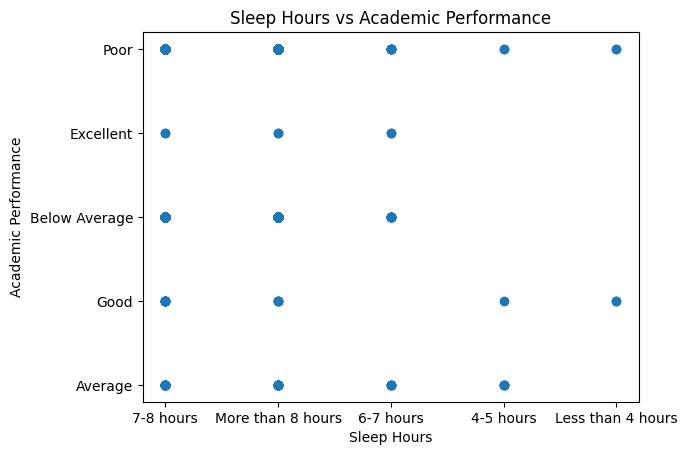

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Student Insomnia and Educational Outcomes Dataset.csv")
df.head()

stress_col = "14. How would you describe your stress levels related to academic workload?"
sleep_col = "4. On average, how many hours of sleep do you get on a typical day?"
target_col = "15. How would you rate your overall academic performance (GPA or grades) in the past semester?"

plt.figure()
plt.scatter(df[sleep_col], df[target_col])
plt.xlabel('Sleep Hours')
plt.ylabel('Academic Performance')
plt.title('Sleep Hours vs Academic Performance')
plt.show()


## Ordinal Regression Modeling


In [5]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import mean_absolute_error
import pandas as pd

data=pd.read_csv("Student Insomnia and Educational Outcomes Dataset.csv")

stress_col = "14. How would you describe your stress levels related to academic workload?"
sleep_col = "4. On average, how many hours of sleep do you get on a typical day?"
target_col = "15. How would you rate your overall academic performance (GPA or grades) in the past semester?"

data[stress_col] =data[stress_col].map({"No stress": 1,"Low stress": 2,"High stress": 3, "Extremely high stress": 4})
data[sleep_col]=data[sleep_col].map({"Less than 4 hours": 1,"4-5 hours": 2,"5-6 hrs": 3,"6-7 hours": 4,"7-8 hours": 5,"More than 8 hours": 6})
data[target_col]=data[target_col].map({"Poor": 1,"Below Average": 2,"Average": 3,"Good": 4, "Excellent": 5})

data = data.dropna()

X=data[[stress_col,sleep_col]]
y=data[target_col]

model=OrderedModel(y,X,distr="logit")
result=model.fit()
print(result.summary())

pred_probs = result.model.predict(result.params, X)
y_pred = pred_probs.argmax(axis=1) + 1
mae = mean_absolute_error(y, y_pred)


print("MAE:", round(mae, 3))



Optimization terminated successfully.
         Current function value: 0.968916
         Iterations: 419
         Function evaluations: 653
                                                                   OrderedModel Results                                                                   
Dep. Variable:     15. How would you rate your overall academic performance (GPA or grades) in the past semester?   Log-Likelihood:                -766.41
Model:                                                                                               OrderedModel   AIC:                             1545.
Method:                                                                                        Maximum Likelihood   BIC:                             1573.
Date:                                                                                            Wed, 31 Dec 2025                                         
Time:                                                                                

## Key Insights
- Increased sleep duration is associated with better academic performance
- Higher stress levels negatively impact academic outcomes
- Ordinal regression effectively models ordered academic categories
